![](images/EscUpmPolit_p.gif "UPM")

# Course Notes for Learning Intelligent Systems

Department of Telematic Engineering Systems, Universidad Politécnica de Madrid, © Carlos A. Iglesias

## [Introduction to  Network Analysis](0_Intro_Network_Analysis.ipynb)

# Table of Contents

* [Working with Graphs](#Working-with-Graphs)
* [First steps](#First-steps)
* [Reading Data from a File](#Reading-Data-from-a-File)

# Working with Graphs


## Import networkx
The first thing is importing the package.


In [2]:
import networkx as nx

## Graph

In [3]:
G = nx.Graph()

## Nodes
NetworkX is very flexible. Nodes can be any hashable object, such as strings, numbers, files, functions, etc.

In [4]:
G.add_node(1) # integer

In [5]:
G.add_node('A') #string

In [6]:
import math
G.add_node(math.cos) #cosine function

In [7]:
print(G.nodes)

[1, 'A', <built-in function cos>]


## Edges
Edges (links) are represented as tuples of nodes.

In [8]:
G.add_edge(1, 'A')

In [9]:
G.add_edge('B', math.cos)

In [10]:
print(G.edges)

[(1, 'A'), (<built-in function cos>, 'B')]


## Edge data

Edge data is assigned using a tuple (node1, node2, data). 

Default data  is {} (empty dictionary), but any Python object is allowed.

In [11]:
W = nx.Graph()

In [12]:
W.add_edge('A', 'B', weight = 1)

In [13]:
W.add_weighted_edges_from([('A', 'C', 3), ('A', 'D', 4), ('B', 'D', 2)])

{('A', 'B'): Text(0.34360816042257025, 0.03772295893763749, '1'),
 ('A', 'C'): Text(-0.6125262066395303, 0.16919086402801908, '3'),
 ('A', 'D'): Text(0.04386563293789962, -0.17119492412470283, '4'),
 ('B', 'D'): Text(0.6125262066395304, -0.16919086402801906, '2')}

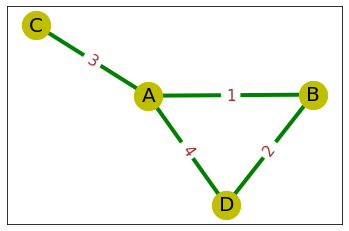

In [14]:
pos = nx.spring_layout(W)  # positions for all nodes
labels = nx.get_edge_attributes(W,'weight')
nx.draw_networkx(W, pos=pos, node_size=800, node_color='y', font_size=20)
nx.draw_networkx_edges(W,pos,width=4, edge_color='g', arrows=False)
nx.draw_networkx_edge_labels(W,pos,edge_labels=labels, font_color='brown', font_size=15)

For more info about draw_networkx see the [NetworkX manual](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx)

Let's access edges

In [15]:
print(W.edges) # List of all edges; same than W.edges() with default parameters

[('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'D')]


In [16]:
print(W.edges(data=True)) # List of all edges with data

[('A', 'B', {'weight': 1}), ('A', 'C', {'weight': 3}), ('A', 'D', {'weight': 4}), ('B', 'D', {'weight': 2})]


In [17]:
print(W.edges(data='weight')) # List of all edges with attribute 'weight'

[('A', 'B', 1), ('A', 'C', 3), ('A', 'D', 4), ('B', 'D', 2)]


Let's calculate Dijsktra shortest weighted path:

{('A', 'B'): Text(-0.17186208433735098, -0.2876883893655454, '1'),
 ('A', 'C'): Text(0.10060091197009038, 0.6027184602573036, '3'),
 ('A', 'D'): Text(0.1315138115456491, -0.10959315037715107, '4'),
 ('B', 'D'): Text(-0.10060091197009048, -0.6027184602573037, '2')}

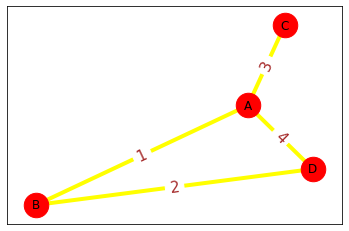

In [18]:
pos = nx.spring_layout(W)  # positions for all nodes
labels = nx.get_edge_attributes(W,'weight')
nx.draw_networkx(W, pos=pos, node_color='red', node_size=600)
nx.draw_networkx_edges(W,pos,width=4, edge_color='yellow', arrows=False)
nx.draw_networkx_edge_labels(W,pos,edge_labels=labels, font_color='brown', font_size=15)

In [19]:
nx.dijkstra_path(W, 'C', 'D')

['C', 'A', 'B', 'D']

## NetworkX  design principles
* "Node centric" view of networks
* Nodes: any hashable object
* Edges: three tuples (n1, n2, d) with optional edge data
* Edge data can be defined by users

## Network data structure
* Uses a "dictionary of dictionaries"

* **G.adj** is the Graph adjacency object: 
    * **key**: node; 
    * **value**: neighbor-dicts

In [20]:
print(W.adj)

{'A': {'B': {'weight': 1}, 'C': {'weight': 3}, 'D': {'weight': 4}}, 'B': {'A': {'weight': 1}, 'D': {'weight': 2}}, 'C': {'A': {'weight': 3}}, 'D': {'A': {'weight': 4}, 'B': {'weight': 2}}}


# Simple operations
In this way, it is easy...

In [21]:
# Test if a node is in the graph
'A' in W

True

In [22]:
# loop over all the nodes
for n in W:
   print(n)

A
B
C
D


# Edge attributes

In [23]:
# Access an edge

W['A']['B']

{'weight': 1}

In [24]:
W.adj['A']['B']

{'weight': 1}

In [25]:
# Access an attribute
W['A']['B']['weight']

1

## Multigraphs

In [26]:
MG = nx.MultiGraph()
MG.add_edge('A', 'B', relation = 'friend', color = 'b', weight = 3)
MG.add_edge('A', 'B', relation = 'neighbour', color = 'r', weight = 8)
MG.add_edge('A', 'C', relation = 'father', color = 'c', weight = 1)
MG.add_edge('A', 'D', relation = 'friend', color = 'b', weight = 2)


0

In [27]:
#Dictionary per every edge
print(MG['A']['B'])

{0: {'relation': 'friend', 'color': 'b', 'weight': 3}, 1: {'relation': 'neighbour', 'color': 'r', 'weight': 8}}


# Node attributes

In [28]:
G = nx.Graph()

In [29]:
G.add_edge('Predeal', 'Bucharest', distance=158)

In [30]:
G.add_edge('Predeal', 'Brasov', distance=26.7)

In [31]:
G.add_node('Predeal', population=4755)

In [32]:
G.add_node('Bucharest', population=1812290)

In [33]:
G.add_node('Brasov', population=550547)

In [34]:
# List of nodes 
print(G.nodes())

['Predeal', 'Bucharest', 'Brasov']


In [35]:
#list of nodes attributes
print(G.nodes(data=True))

[('Predeal', {'population': 4755}), ('Bucharest', {'population': 1812290}), ('Brasov', {'population': 550547})]


In [36]:
#Access one attribute
print(G.nodes['Predeal']['population'])

4755


# References
* Networkx tutorial https://networkx.github.io/documentation/stable/tutorial.html

## Licence

The notebook is freely licensed under under the [Creative Commons Attribution Share-Alike license](https://creativecommons.org/licenses/by/2.0/).  

© Carlos A. Iglesias, Universidad Politécnica de Madrid.